In [1]:
# matplotlib configuration
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 300

# dependencies
import numpy as np
from scipy.stats import entropy

# notebook theming
from jupyterthemes import jtplot
jtplot.style()

# import embo
import sys
sys.path.append("../..")
from embo.embo import empirical_bottleneck

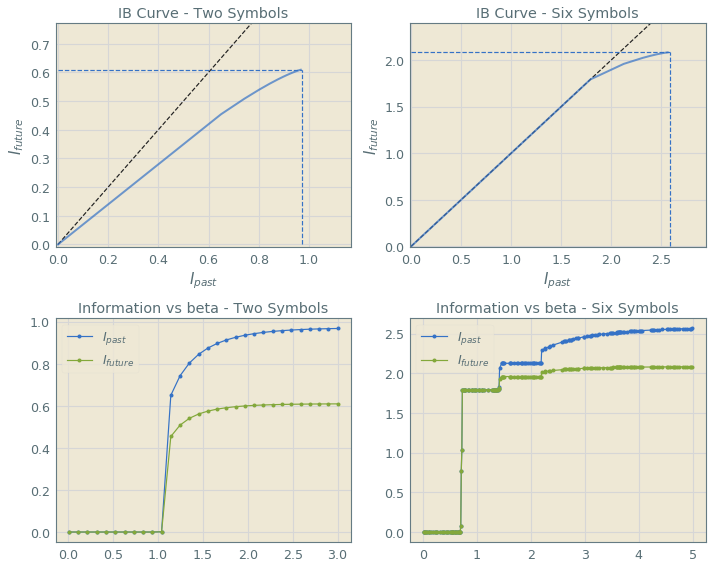

In [2]:
def IB_plot(x,y,ax,title,ax2=None,**kw):
    """Compute and plot an IB curve"""
    i_p,i_f,beta,mi,h_p,h_f = empirical_bottleneck(x,y,**kw)
    ax.plot(np.arange(0,(mi*1.5)+.1,.1),np.arange(0,(mi*1.5)+.1,.1),'--k')
    ax.plot([0, h_p], [mi, mi], '--b') # upper bound for I(M:Y) is MI(X:Y)
    ax.plot([h_p,h_p], [0, mi], '--b') # upper bound for I(M:X) is H(X), given that M has the same cardinality as X
    ax.plot(i_p,i_f,"-b",lw=2,alpha = .7)
    ax.set_ylim(-0.01,(mi*1.1)+.1)
    ax.set_xlim(-.01,(h_p*1.1)+.1)
    ax.set_title('IB Curve - {}'.format(title))
    ax.set_ylabel("$I_{future}$",size=15)
    ax.set_xlabel("$I_{past}$",size=15)
    if not ax2 is None:
        ax2.plot(beta,i_p,label="$I_{past}$",marker='o',markersize=4)
        ax2.plot(beta,i_f,label="$I_{future}$",marker='o',markersize=4)
        ax2.legend()
        ax2.set_title('Information vs beta - {}'.format(title))
    return i_p,i_f,beta,mi,h_p,h_f



# Fake data with arrays of two symbols
x2 = np.array([0,0,0,1,0,1,0,1,0,1]*300)
y2 = np.array([1,0,1,0,1,0,1,0,1,0]*300)

# Fake data with arrays of six symbols
x6 = np.array([0,1,2,3,4,5,0,1,2,3,4,5]*300)
y6 = np.array([0,1,0,3,4,5,0,0,2,3,4,5]*300)

# make plots
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
IB_plot(x2,y2,ax[0,0],ax2=ax[1,0],maxbeta=3,numbeta=30,title="Two Symbols")
IB_plot(x6,y6,ax[0,1],ax2=ax[1,1],maxbeta=5,numbeta=500,title="Six Symbols")
plt.tight_layout()